# Classification methods

# Contents

    1. Methods
        1. Logistic Regression
        2. KNN
        3. Classifiaction Trees
        4. Random Forest
        5. Suport Vector Machines
        6. Kernel SVM
        7. Naive Bayes
    2. Evaluation of Models
        1. Confusion Matrix
        2. Accuracy Score
        3. Accuracy Paradox
        4. Precision Score
        5. Recall Score
        6. F1 Score
        7. CAP Curve
        8. ROC Curve
        9. AUC Curve

## Logistic Regression

The first classification method that we will be going through is Logistic Regression. With this method we will look at both of the libraries that can be used to do the predictions.

The data we will be using is a prediction of the purchase of a good based on factors such as age and estimated Salary.

Now that we have a dataset with $n=400$ we should split the sample into a train and test sample which we will be doing for the models using this data.

In [16]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
dataset = pd.read_csv('data\Social_Network_Ads.csv')
sc_x = StandardScaler()
y = dataset.iloc[:,-1]
x = dataset.iloc[:,2:4]
x = sc_x.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
prediction = log_reg.predict(x_test)

Now that we havea  predicted value it always useful to see how things got allocated against their actual value using the confusion Matrix:

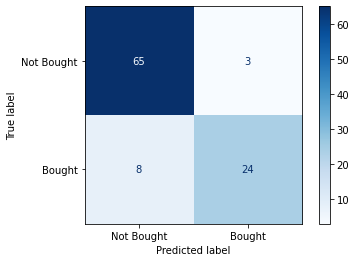

In [17]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg,x_test,y_test,display_labels=['Not Bought','Bought'],cmap='Blues')

This is the usual output we expect from sklearn with us having to address the instance we have created to find the Coefficients and use other calls. Let's now look at the statsmodels library and see what is avaliable as output.

In [18]:
x_train2 = sm.add_constant(x_train)
log_reg2=sm.Logit(exog=x_train2,endog=y_train)
log_reg2.fit().summary(yname='Purchase Behaviour',xname=['Intercept','Age','Income'])

Optimization terminated successfully.
         Current function value: 0.371982
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Purchase Behaviour   No. Observations:                  300
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            2
Date:                Sun, 07 Jun 2020   Pseudo R-squ.:                  0.4355
Time:                        21:12:35   Log-Likelihood:                -111.59
converged:                       True   LL-Null:                       -197.69
Covariance Type:            nonrobust   LLR p-value:                 4.080e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1036      0.189     -5.847      0.000      -1.474      -0.734
Age            2.3502      0.300      7.831      0.000       1.762       2.938
Income         1.1981      0.206      5.821      0.000       0.795       1.601
==============================================================================
"""

Again this output looks very similar to other software we may have used, the one key consideration is remembering to include the intercept variable as it is not automatically added.

## KNN

K Nearest Neighbors is the next classification method we will look at. Again we will use the same data set and will need to use the scaling on X variables as this is a distance based classification.

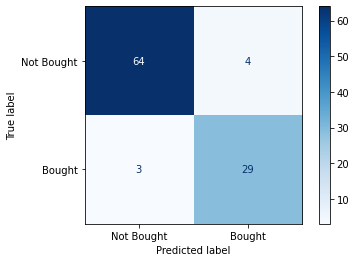

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_class = KNeighborsClassifier()
knn_class.fit(x_train,y_train)
plot_confusion_matrix(knn_class,x_test,y_test,display_labels=['Not Bought','Bought'],cmap='Blues')

## Classification Trees

Just like Regression Trees we also have a tree method for Classification's, We will be using the same data as before to try to predict the purchase behavor of the respondents.

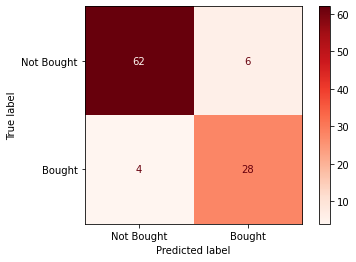

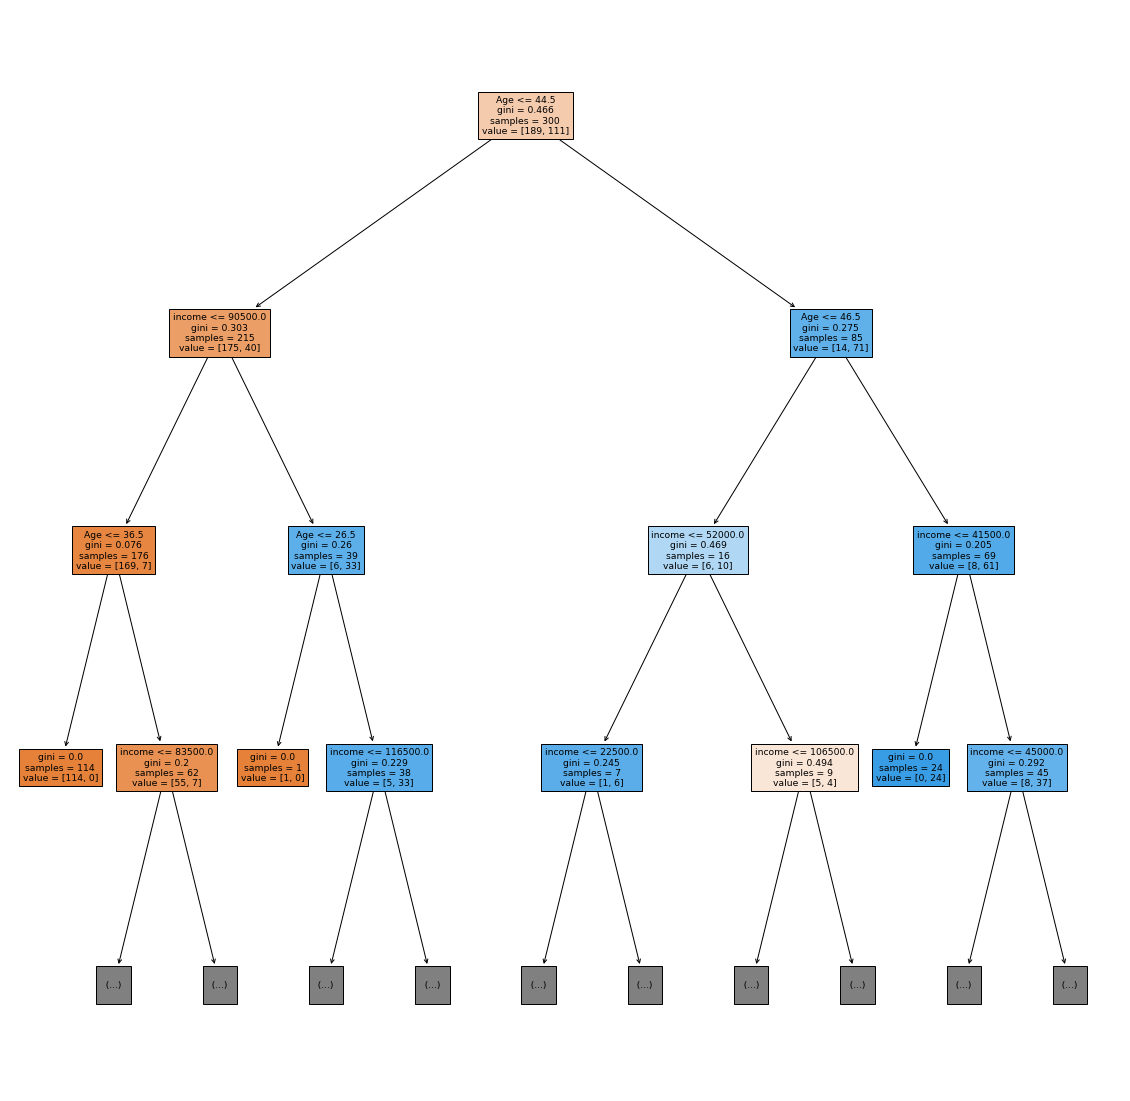

In [20]:
from sklearn.tree import DecisionTreeClassifier

y = dataset.iloc[:,-1]
x = dataset.iloc[:,2:4]
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)
tree_class = DecisionTreeClassifier()
tree_class.fit(x_train,y_train)
plot_confusion_matrix(tree_class,x_test,y_test,display_labels=["Not Bought",'Bought'],cmap='Reds')
plt.figure(figsize=(20,20))
plot_tree(tree_class,feature_names=['Age','income'],max_depth=3,filled=True)
plt.show()

I have reduced the depth displayed so we can have a better view of the Tree model but we can see a good fit on teh confusion matrix.

## Random Forest

The next section is Random forest, again this is an ensmeble method that uses multiple Decision trees to determine the best classifier for our data, we will use the same dataset again:

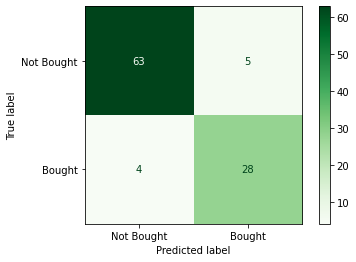

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_class =RandomForestClassifier()
rf_class.fit(x_train,y_train)
plot_confusion_matrix(rf_class,x_test,y_test,display_labels=['Not Bought','Bought'],cmap='Greens')




## Support Vector Machines

We are now going to do a general support vector machine before we start to look at the various kernels that are avaliable for the classification:

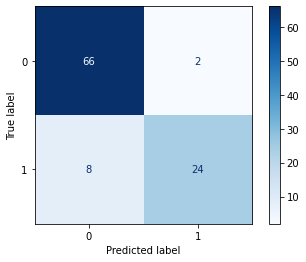

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
sc_x = StandardScaler()

dataset = pd.read_csv('data\Social_Network_Ads.csv')
y = dataset.iloc[:,-1]
x = dataset.iloc[:,2:4]
x = sc_x.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)
from sklearn.svm import SVC

sv_class = SVC(random_state=0,kernel='linear')
sv_class.fit(x_train,y_train)
plot_confusion_matrix(sv_class,x_test,y_test,cmap='Blues')

## Kernel SVM

Now as we may know it is not always applicable to fit the same relationship to different data set as some of them have very different relationships.

This is where Kernel SVM fits in it will fit a SVM model with different relationships to the data. Let's have a look at functions in SVM that we can fit:

* RBF (Gaussian Kernel)
 * the default non parametric function that fits a multi dimensional space to the data which helps if one group is encased by the other group.
* Sigmoid Kernel
 * You are fitting an S curve to the data.
* Polynomial Kernels
 * We fit a polynomial to the data (Like in Polynomial regression).
 
Let's now fit one of the Other Kernel's to our data:
 

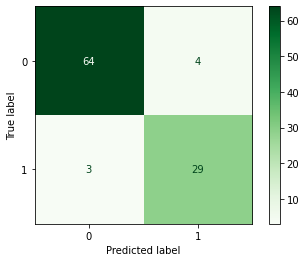

In [23]:
 
sv_class2 = SVC(random_state=0,kernel='rbf')
 
sv_class2.fit(x_train,y_train)
plot_confusion_matrix(sv_class2,x_test,y_test,cmap='Greens')

from the results we can see that although we have a drop in the correct classification for not buying the vehicle the number of correct classifications for will buy has increased.

## Naive Bayes

The next analysis technique we will look at is how to do Naive Bayes in Python. This method will use the same data sets as previously.

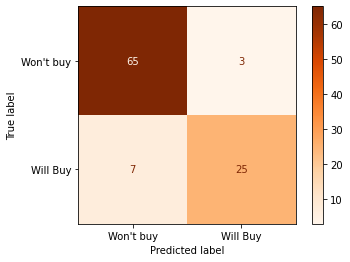

In [24]:
from sklearn.naive_bayes import GaussianNB

classiferNB=GaussianNB()

classiferNB.fit(x_train,y_train)
plot_confusion_matrix(classiferNB,x_test,y_test,cmap='Oranges',display_labels=['Won\'t buy','Will Buy'])

## Evaluation of Classification Models

When we started looking at classification models we generally accept that if we are working with probabilities then a 0.5 and below probability will be classified as a no / 0 and above 0.5 will be a yes or 1.

We will generally find that we will have False Positives and Negatives predicted in our models:

* A false positive is a Type one Error
 * Predicted that someone will say Yes but it was actually a no
* A false Negative is a Type two Error
 * Predicted that someone will say No but it was actually a Yes

The extremity of these errors differ, and we will usually need to look at the two different cases as we don't always want to predict something won't happen when it does.

### Confusion Matrix

We have seen the confusion Matrix with most of the classifiers we have used with very little explanation. If we consider that the Confusion matrix is a way for us to graphically represent our correct predictions verus Type I and Type II Errors.

Type I Errors are in Top Right of the confusion Matrix, Type II Errors are in the bottom Left (These are for a 2 x 2 Confusion Matrix).

The Diagonal is the correct Predictions.

The ideal situation we want to see is the diaganol to have the highest proportions so we are making accurate predictions with low number of Type I and II Errors.

### Accuracy Score

This Metric is calculated by $\frac{Number of Correct Predictions}{Total Number of Predictions Made}*100$

We can calcualte these using SKLearn using the following code:

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,classiferNB.predict(x_test))


0.9

From this number we can see that the accuracy of the Naive Bayes is 90%.

### Accuracy Paradox

The Accuracy paradox  is the paradoxial finding that accuracy is not a great prediction of classification. This could be the case when a model may be too simple and may have a high accuracy but may be too crude to be useful.

Let's look at an example. We have a sample of 10 000 - which we have predicted and have correctly predicted 9800 = 98% Accuracy

In the original dataset there is more respondents that have bought the product than the predicted number.

So if we were to abandon the model and assume that everyone has bought the project we will have a higher accuracy score as we have a lower Type I errors.

This would look like the model is not as accurate as a blanket assumption **So we should use caution when we use accuracy for model selection**.

### Precision Score

Precision is similar to Accuracy except it is a measure of a classifiers exactness. It is calculated using the following Formula: $\frac{True Positives}{True Positives + False Positive}$ or to put this in another way it is the number True positive Predictions divided by the total number of positive class predicton(Predictied True in the classifier model).

A low precision score can be an indication of a large number of false positives.

We can calculate the precision using the following code in SKLearn:

In [26]:
from sklearn.metrics import precision_score
precision_score(y_test,classiferNB.predict(x_test))

0.8928571428571429

From this value we can see that we have a high precision of the predictions we have made of the respondents that will purchase the product.

### Recall Score (Sensitivity)

This can be thought of as the classifiers Completeness. We can calculate it using the following formula $\frac{True Positives}{True Positives + False Negatives}$

This is a score that looks at the number of positive predictions against the number of positives in the test data.

This can be calculated using the following code:

In [27]:
from sklearn.metrics import recall_score
recall_score(y_test,classiferNB.predict(x_test))

0.78125

As we can see of the original consumers that would buy in our test set we have accurately predicted 78% of them.

### F1 Score

This is a score that shows the balance between the recall and the precision. It is calculated using the following Formula: $2*\frac{precision*recall}{precision+recall}$

This can be calculated using the following code:

In [28]:
from sklearn.metrics import f1_score
f1_score(y_test,classiferNB.predict(x_test))

0.8333333333333334

The higher the value the more balance we have between the precision and recall scores.

### Cap Curve

This is also know as the cumulative accuracy profile.

To calculate this we know what the general overall response rate so for instance if we know 10% will resond we can guess that if 20 000 receive a message then 2000 will respond.

With the CAP Curve we are looking for our model to offer efficiencies above a general feeling of the responses so if we use the example from above we want our model to have a more targeted approach so as we approach people we should have more than 10% response rate as then we have a model that gives us more of an advantage with how we target our audience.

Let's do a quick chart to show the various options:

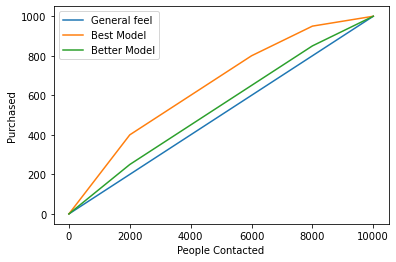

In [29]:
x_ordinary = pd.DataFrame([0,2000,4000,6000,8000,10000])
y_best = pd.DataFrame([0,400,600,800,950,1000])
y_better = pd.DataFrame([0,250,450,650,850,1000])

plt.plot(x_ordinary,x_ordinary*0.1,label='General feel')
plt.plot(x_ordinary,y_best,label='Best Model')
plt.plot(x_ordinary,y_better,label='Better Model')
plt.legend()
plt.xlabel('People Contacted')
plt.ylabel('Purchased')
plt.show()

from the graph above we can see that we have a general perception that we will have 10% purchase rate with the people we reach out to. We have a "Best" model which allows us to reach the same peopl at a higher percentage of purchase and a model in between which still increases the sales but not as well as the best model.

just a quick note - the data still has a limitation of the ten percent so the maximum we can reach is 1000 purchases.

We also have a crystal ball line - the ideal would be to know exactly which ten percent to reach and hit the line immediately, so reach the exact 1000 people to get a 100% purchase success rate.

We also have a ROC which is the Receiver Operating Characteristic which is not the same thing.

### ROC Curve

This is also know as the Receiver Operator Characteristic. It is done by plotting the the True Positive rate against the False Positive rate at various threshold settings.

The True-Positive rate is also know as Recall which we have learnt about already and tne False Positive rate is know as the probability of false alarm and can be calculated with $1 - \frac{TN}{TN+FP}$



It is calculated using the following code:

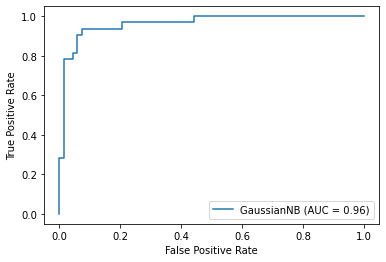

In [30]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(classiferNB,x_test,y_test)

When looking at the curve we want to be above the 45 degree line as this is better. The best situation is at the 1 point.

### AUC

This stands for Area under the curve is equal to the probability that a classiffer will rank a randomly chosen positive instance higher than a randomly chosen negative one.

AUC is between 0 and 1 and the best case is when the negatives and positives can be distinguished between each other and has a value of 1. At a 0.5 there is not discrimination capacity.